##Load Modules

In [1]:
import numpy as np
import pandas as pd
import re
import string
from nltk.util import pr

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [3]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopword = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
stemmer = nltk.SnowballStemmer("english")

##Import Dataset and Describe

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/twitter_data.csv')

In [6]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [7]:
df.tail()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies
24782,25296,3,0,0,3,2,~~Ruffled | Ntac Eileen Dahlia - Beautiful col...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [9]:
df.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [10]:
df.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [11]:
df['labels'] = df["class"].map({0 :"Hate Speech Detected",
                                1: "Offensive Speech Detected",
                                2: "Neither Hate Nor Offense"})

In [12]:
data = df[['tweet', 'labels']]

In [13]:
data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,Neither Hate Nor Offense
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Speech Detected
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Speech Detected
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Speech Detected
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Speech Detected
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Speech Detected
24779,"you've gone and broke the wrong heart baby, an...",Neither Hate Nor Offense
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Speech Detected
24781,youu got wild bitches tellin you lies,Offensive Speech Detected


##Create Cleaning Function and Implement Stopwords, Stemmer, CountVectorizer and DecisionTree

In [14]:
def clean_data(text):
  #Convert text to lowercase
  text = text.lower()

  #Remove URL and Web Links
  text = re.sub('https?://\S+|www\.S+', '', text)

  #Remove Squared braces
  text = re.sub('\[.*?\]', '', text)

  #Remove angle bracket
  text = re.sub('<.*?>', '', text)

  #Remove punctuation
  text = re.sub('[{}]'.format(re.escape(string.punctuation)), '', text)

  #Remove newline character
  text = text.replace('\n', '')

  #Remove words containing digits
  text = re.sub('\w*\d\w*', '', text)

  return text

  #StopWords Removal
  text = [word for word in text.split() if word not in stopwords]
  text = " ".join(text)

df['tweet'] = df['tweet'].apply(clean_data)
print(df.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  \
0   rt mayasolovely as a woman you shouldnt compl...   
1   rt  boy dats coldtyga dwn bad for cuffin dat ...   
2   rt urkindofbrand dawg rt  you ever fuck a bit...   
3     rt cganderson vivabased she look like a tranny   
4   rt shenikaroberts the shit you hear about me ...   

                      labels  
0   Neither Hate Nor Offense  
1  Offensive Speech Detected  
2  Offensive Speech Detected  
3  Offensive Speech Detected  
4  Offensive Speech Detected  


##Model Development


In [15]:
x = np.array(df['tweet'])
y= np.array(df['labels'])
cv = CountVectorizer()

x = cv.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

clf = DecisionTreeClassifier()

clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [22]:
y_pred = clf.predict(x_test)

In [23]:
#confusion matrix and accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 142,   50,  273],
       [  69, 1111,  199],
       [ 247,  265, 5823]])

<Axes: >

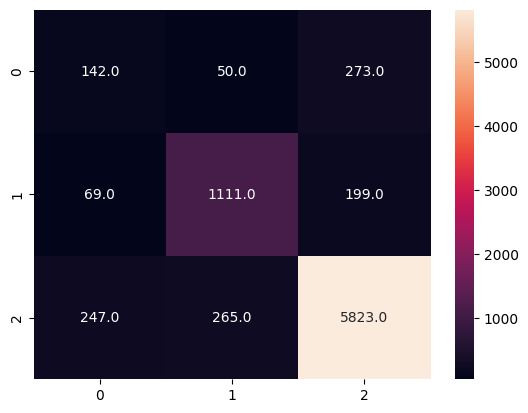

In [24]:
sns.heatmap(cm, annot = True, fmt = ".1f")

In [25]:
text_data = "I’m not stopping by my place but now I am on the galaxy of my love with my love of my baby girl I miss her too much but she isn’t even doing it all right I just got home from my moms and I was like I don’t have a good time and I’m just going home now and I have a headache so I’m sorry I don’t know what to bath is it but now I don’t have a good day I don’t want you too baby I’m just too lazy"
df = cv.transform([text_data]).toarray()
print(clf.predict(df))

['Offensive Speech Detected']


In [26]:
text_data1 = "Shut up you Bitch"
df = cv.transform([text_data1]).toarray()
print(clf.predict(df))

['Offensive Speech Detected']
